In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Bank_nifty.csv",index_col=0)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8072.799805,8356.349609,8072.799805,8340.299805,8340.299805,0
2012-01-04,8388.950195,8453.400391,8294.349609,8408.400391,8408.400391,0
2012-01-05,8421.500000,8516.150391,8394.250000,8454.900391,8454.900391,0
2012-01-06,8397.349609,8586.650391,8297.549805,8488.250000,8488.250000,0
2012-01-09,8450.400391,8517.799805,8329.900391,8481.349609,8481.349609,0
...,...,...,...,...,...,...
2021-12-27,34573.648438,35143.699219,34233.000000,35057.898438,35057.898438,335100
2021-12-28,35308.300781,35352.398438,35037.898438,35183.800781,35183.800781,181600
2021-12-29,35168.851562,35378.300781,34890.800781,35045.398438,35045.398438,122500


In [3]:
df.index = pd.to_datetime(df.index)

In [4]:
df.drop(["Adj Close","Volume"],axis = 1,inplace=True)

In [5]:
df["Next_day_close"] = df.Close.shift(-1)

In [6]:
df

,Open,High,Low,Close,Next_day_close
Date,,,,,
2012-01-03,8072.799805,8356.349609,8072.799805,8340.299805,8408.400391
2012-01-04,8388.950195,8453.400391,8294.349609,8408.400391,8454.900391
2012-01-05,8421.500000,8516.150391,8394.250000,8454.900391,8488.250000
2012-01-06,8397.349609,8586.650391,8297.549805,8488.250000,8481.349609
2012-01-09,8450.400391,8517.799805,8329.900391,8481.349609,8735.049805
...,...,...,...,...,...
2021-12-27,34573.648438,35143.699219,34233.000000,35057.898438,35183.800781
2021-12-28,35308.300781,35352.398438,35037.898438,35183.800781,35045.398438
2021-12-29,35168.851562,35378.300781,34890.800781,35045.398438,35063.601562


In [7]:
df.fillna(0,inplace=True)

In [8]:
df

,Open,High,Low,Close,Next_day_close
Date,,,,,
2012-01-03,8072.799805,8356.349609,8072.799805,8340.299805,8408.400391
2012-01-04,8388.950195,8453.400391,8294.349609,8408.400391,8454.900391
2012-01-05,8421.500000,8516.150391,8394.250000,8454.900391,8488.250000
2012-01-06,8397.349609,8586.650391,8297.549805,8488.250000,8481.349609
2012-01-09,8450.400391,8517.799805,8329.900391,8481.349609,8735.049805
...,...,...,...,...,...
2021-12-27,34573.648438,35143.699219,34233.000000,35057.898438,35183.800781
2021-12-28,35308.300781,35352.398438,35037.898438,35183.800781,35045.398438
2021-12-29,35168.851562,35378.300781,34890.800781,35045.398438,35063.601562


In [9]:
X = df.drop("Next_day_close",axis = 1)
y = df.Next_day_close

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9354443541796948

In [12]:
y_pred = model.predict(X_test)

In [14]:
X_test["Next_day_close"] = y_test.values

In [15]:
X_test["Predicted_close"] = y_pred

In [16]:
X_test

,Open,High,Low,Close,Next_day_close,Predicted_close
Date,,,,,,
2019-05-09,28893.949219,29040.300781,28784.650391,28884.599609,29040.500000,28903.642658
2019-05-10,28927.599609,29202.849609,28900.099609,29040.500000,28659.949219,29069.415894
2019-05-13,29026.650391,29049.050781,28621.099609,28659.949219,28829.199219,28657.037583
2019-05-14,28718.750000,29058.300781,28582.599609,28829.199219,28616.449219,28844.535742
2019-05-15,28925.449219,28983.150391,28555.150391,28616.449219,28855.300781,28615.998208
...,...,...,...,...,...,...
2021-12-27,34573.648438,35143.699219,34233.000000,35057.898438,35183.800781,35016.621231
2021-12-28,35308.300781,35352.398438,35037.898438,35183.800781,35045.398438,35179.988000
2021-12-29,35168.851562,35378.300781,34890.800781,35045.398438,35063.601562,35050.967372


In [20]:
set_flag = pd.Series(np.where(X_test.Close < X_test.Next_day_close, "U", "D"))
X_test["actual_direction"] = set_flag.values

In [22]:
set_flag1 = pd.Series(np.where(X_test.Close < X_test.Predicted_close, "U", "D"))
X_test["Predicted_direction"] = set_flag1.values

In [23]:
X_test

,Open,High,Low,Close,Next_day_close,Predicted_close,actual_direction,Predicted_direction
Date,,,,,,,,
2019-05-09,28893.949219,29040.300781,28784.650391,28884.599609,29040.500000,28903.642658,U,U
2019-05-10,28927.599609,29202.849609,28900.099609,29040.500000,28659.949219,29069.415894,D,U
2019-05-13,29026.650391,29049.050781,28621.099609,28659.949219,28829.199219,28657.037583,U,D
2019-05-14,28718.750000,29058.300781,28582.599609,28829.199219,28616.449219,28844.535742,D,U
2019-05-15,28925.449219,28983.150391,28555.150391,28616.449219,28855.300781,28615.998208,U,D
...,...,...,...,...,...,...,...,...
2021-12-27,34573.648438,35143.699219,34233.000000,35057.898438,35183.800781,35016.621231,U,D
2021-12-28,35308.300781,35352.398438,35037.898438,35183.800781,35045.398438,35179.988000,D,D
2021-12-29,35168.851562,35378.300781,34890.800781,35045.398438,35063.601562,35050.967372,U,U


In [25]:
success = X_test[X_test.actual_direction == X_test.Predicted_direction]

In [27]:
success_index=success.index

In [29]:
failure = X_test.drop(success_index)

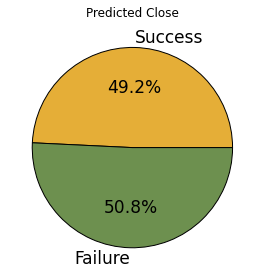

In [38]:
slices=[len(success),len(failure)]
labels = ['Success','Failure']
colors=['#e5ae37','#6d904f']

plt.pie(slices,labels=labels,colors=colors,autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'},textprops={'fontsize': 17},)
plt.title('Predicted Close')
#plt.legend()


plt.tight_layout()

plt.show()
